# Bellabeat Data Analysis using Python

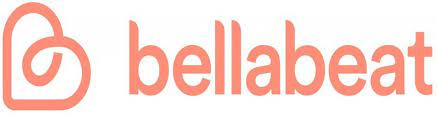

# Scenario

Bellabeat is a high-tech manufacturer of health-focused products for women, founded by Urška Sršen and Sando Mur. They aim to gain insights from smart device data usage to better understand consumer behavior and make informed decisions regarding their marketing strategies.

# Business Objective:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

# Deliverables:
1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top high-level content recommendations based on your analysis

# 1. Ask phase

* Business Task

Analyze smart device data usage and provide recommendations for Bellabeat's marketing strategy. By examining how consumers interact with Bellabeat's smart devices, it will be possible to identify trends, patterns, and valuable insights. These insights will guide future marketing campaigns, enhance customer engagement, and drive growth in the competitive smart device market.

* Key Steakholders
1. Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer.
2. Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team.
3. Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy. 

# 2. Prepare phase

2.1 Information about the data source

[FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit)

- Data Source: Publicly available dataset on Kaggle, consisting of 18 CSV files.
- Data Generation: Respondents from a distributed survey via Amazon Mechanical Turk.
- Collection Period: March 12, 2016, to May 12, 2016.
- Participants: Data collected from 30 Fitbit users who consented to submitting personal tracker data.
- Data Contents: Minute-level output for physical activity, heart rate, and sleep monitoring.
- User Habits: Provides insights into daily activity, steps, and heart rate to explore user habits.
- Consent: Users provided consent for the submission of personal tracker data.
- Data Contents: Includes physical activity, heart rate, sleep monitoring, daily activity, and steps recorded.


2.2 Limitations of the data
- There are limitations mentioned for this dataset. The data is from 2016, which may not be timely or relevant. The sample size of 30 FitBit users is small and may not be representative of the entire population. 
- Additional data may be required to address limitations and enhance analysis.
- The data's reliability, accuracy, and credibility are uncertain, since it's provided from a survey.

2.3 Is Data ROCCC (Reliable, Original, Comprehensive, Current, and Cited)?

- Reliable: The reliability of the data may be considered low, as it was generated by respondents from a distributed survey and collected through Amazon Mechanical Turk. The data's accuracy and reliability cannot be verified directly.

- Original: The originality of the data is low, as it was obtained from a third-party source (Amazon Mechanical Turk) and does not have a clear indication of its source or origin.

- Comprehensive: The data can be considered moderately comprehensive, as it covers parameters related to physical activity, heart rate, sleep monitoring, daily activity, and steps, which align with Bellabeat's products' parameters.

- Current: The data is not current, as it was collected between March 12, 2016, and May 12, 2016, which makes it over five years old and potentially outdated for analyzing current trends or behaviors.

- Cited: The data does not have a clear citation or reference to its source, which raises concerns about its credibility and citation.

Overall, the data does not fulfill the ROCCC criteria, indicating potential issues with reliability, originality, and currentness.

2.4 Importing the required libraries

In [1]:
import numpy as np # data arrays
import pandas as pd # data analysis and data manipulation
import datetime as dt #date time
import glob #retrieving file paths
import os #to perform operations related to file and directory handling
import seaborn as sns  # Importing seaborn library for statistical data visualization
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot for creating static visualizations


2.5 Data to be analized 

- Data was chosen based on the search for insights related to smart device usage, physical activity, sleep patterns, weight management, and calories burned througout the range that this data was collected.
    * daily_activity: To analyze trends in activity levels throughout the day, identify peak active hours, sedentary periods, and explore correlations between calorie burn and factors like activity levels, sleep duration, or weight changes. It merged daily_intensities (which we can analyze different intensity levels of physical activity and identify patterns of light, moderate, and high-intensity activities), daily_calories (which we can find trends in daily calorie burned and to explore correlations between calorie and factors like activity levels, sleep duration, or weight changes), and daily_steps (which we can examine trends in step counts and identify days with higher or lower activity levels).
    * sleep_day: The inclusion of sleep data is essential to understand sleep patterns and potential correlations between sleep quality and activity levels. This will provide insights into the impact of sleep on overall health and well-being.
    * weight_log: Tracking weight changes over time will allow you to identify trends in weight loss or gain. By investigating correlations between weight changes and factors like activity levels, sleep duration, or calorie burn, you can gain valuable information on weight management.
    * heart_rate: This dataset will be valuable in understanding the correlation between heart rate, calories burned, and different intensity levels of physical activity. Heart rate data can provide insights into the intensity and effectiveness of various activities.


2.6 Loading the data into a pandas DataFrame

- Loading data into a pandas DataFrame enables easy data manipulation, analysis, and visualization, facilitating tasks such as organizing data, performing operations, analyzing statistics, cleaning data, creating visualizations, and integrating with other libraries.

In [2]:
# Loading data frames using pd.read to read CSV files into a pandas DataFrame
daily_activity = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
sleepday = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
weight_log = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')
heart_rate = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv')


In [3]:
# Check for unique users
print("Daily Activity Dataset:",daily_activity.Id.nunique(), "unique users")
print("SleepDay Dataset:",sleepday.Id.nunique(), "unique users")
print("Weight Log Dataset:",weight_log.Id.nunique(), "unique users")
print("Heart Rate Dataset:",heart_rate.Id.nunique(), "unique users")

Daily Activity Dataset: 33 unique users
SleepDay Dataset: 24 unique users
Weight Log Dataset: 8 unique users
Heart Rate Dataset: 14 unique users


In [4]:
# Check Common Identifier (Id) 

# Check for missing values in each dataset
print("Daily Activity Dataset - Missing Values:")
print(daily_activity.isnull().sum())

print("\nSleepDay Dataset - Missing Values:")
print(sleepday.isnull().sum())

print("\nWeight Log Dataset - Missing Values:")
print(weight_log.isnull().sum())

print("\nHeart Rate Dataset - Missing Values:")
print(heart_rate.isnull().sum())


Daily Activity Dataset - Missing Values:
Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

SleepDay Dataset - Missing Values:
Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

Weight Log Dataset - Missing Values:
Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

Heart Rate Dataset - Missing Values:
Id       0
Time     0
Value    0
dtype: int64


In [5]:
# Check the dataframe columns
print("Daily Activity:",daily_activity.columns)
print("Sleepday:",sleepday.columns)
print("Weight Log:",weight_log.columns)
print("Heart Rate:",heart_rate.columns)

Daily Activity: Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')
Sleepday: Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object')
Weight Log: Index(['Id', 'Date', 'WeightKg', 'WeightPounds', 'Fat', 'BMI',
       'IsManualReport', 'LogId'],
      dtype='object')
Heart Rate: Index(['Id', 'Time', 'Value'], dtype='object')


In [6]:
# Check the dataframe shape
print("Daily Activity:",daily_activity.shape)
print("Sleepday:",sleepday.shape)
print("Weight Log:",weight_log.shape)
print("Heart Rate:",heart_rate.shape)

Daily Activity: (940, 15)
Sleepday: (413, 5)
Weight Log: (67, 8)
Heart Rate: (2483658, 3)


Heart rate has 2483658 rows, because it is tracked each 5 seconds. So let's transform these seconds in minutes, using the average of heart beating for each minute, and the minutes in hours and create 2 new columns for these new grouped values, 'MinuteAverage' and 'HourlyAverage".
Also, removing the 'Value' column.

In [7]:
# Convert the 'Time' column to a pandas datetime object
heart_rate['Time'] = pd.to_datetime(heart_rate['Time'])

# Calculate the heart rate by minute, grouping the data by 'Id' and minute, then calculate the average heart rate for each minute
MinuteAverage = heart_rate.groupby(['Id', pd.Grouper(key='Time', freq='1Min')])['Value'].mean().reset_index()
MinuteAverage.rename(columns={'Value': 'MinuteAverage'}, inplace=True)

# Calculate the heart rate by hour, grouping the data by 'Id' and hour, then calculate the average heart rate for each hour
HourlyAverage = MinuteAverage.groupby(['Id', pd.Grouper(key='Time', freq='1H')])['MinuteAverage'].mean().reset_index()
HourlyAverage.rename(columns={'MinuteAverage': 'HourlyAverage'}, inplace=True)

# Drop the 'Value' column as it's no longer needed
heart_rate.drop(columns=['Value'], inplace=True)

# Merge the MinuteAverage and HourlyAverage DataFrames back to the original heart_rate DataFrame
heart_rate = pd.merge(heart_rate, MinuteAverage[['Id', 'Time', 'MinuteAverage']], on=['Id', 'Time'])
heart_rate = pd.merge(heart_rate, HourlyAverage[['Id', 'Time', 'HourlyAverage']], on=['Id', 'Time'])

# Display the updated heart_rate DataFrame with the new columns
print(heart_rate.head())



           Id                Time  MinuteAverage  HourlyAverage
0  2022484408 2016-04-12 08:00:00     107.444444      66.673115
1  2022484408 2016-04-12 09:00:00      64.000000      65.033879
2  2022484408 2016-04-12 10:00:00      86.555556     106.553668
3  2022484408 2016-04-12 12:00:00      69.272727      65.771296
4  2022484408 2016-04-12 13:00:00      66.200000      82.360444


In [8]:
print("Heart Rate:",heart_rate.shape)

Heart Rate: (3332, 4)


# 3. Process phase
## 3.1 Data transformation

### Data Type Conversion and Standardization

In this step, we convert the date/time columns to the DateTime data type and standardize the format across all DataFrames. This ensures consistency for the merge process.

### Check the data type

In [9]:
print("Daily Activity data type is", daily_activity["ActivityDate"].dtypes, "data type")
print("Sleepday data type is", sleepday["SleepDay"].dtypes, "data type")
print("Weight Log data type is", weight_log["Date"].dtypes, "data type")
print("Heart Rate data type is", heart_rate["Time"].dtypes, "data type")


Daily Activity data type is object data type
Sleepday data type is object data type
Weight Log data type is object data type
Heart Rate data type is datetime64[ns] data type


### Transform the Date to DateTime data type

In [10]:
# Transform Date to DateTime data type
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"])
sleepday['SleepDay'] = pd.to_datetime(sleepday['SleepDay'])
weight_log['Date'] = pd.to_datetime(weight_log['Date'])
heart_rate['Time'] = pd.to_datetime(heart_rate['Time'])


In [11]:
# Check the changes
print("Daily Activity data type is", daily_activity["ActivityDate"].dtypes, "data type")
print("Sleepday data type is", sleepday["SleepDay"].dtypes, "data type")
print("Weight Log data type is", weight_log["Date"].dtypes, "data type")
print("Heart Rate data type is", heart_rate["Time"].dtypes, "data type")


Daily Activity data type is datetime64[ns] data type
Sleepday data type is datetime64[ns] data type
Weight Log data type is datetime64[ns] data type
Heart Rate data type is datetime64[ns] data type


### Checking for duplicates and missing values in each DataFrame

In [12]:
# Checking duplicates
print(daily_activity['ActivityDate'].duplicated().any())
print(sleepday['SleepDay'].duplicated().any())
print(weight_log['Date'].duplicated().any())
print(heart_rate['Time'].duplicated().any())


# Checking missing values
print(daily_activity['ActivityDate'].isnull().any())
print(sleepday['SleepDay'].isnull().any())
print(weight_log['Date'].isnull().any())
print(heart_rate['Time'].isnull().any())


True
True
True
True
False
False
False
False


### Handling missing values and removing duplicates

In [13]:
# 1. daily_activity:
daily_activity.dropna(inplace=True)  # Handle missing values by removing rows with missing values
daily_activity.drop_duplicates(inplace=True)  # Remove duplicates based on all columns

# 2. sleep_day:
sleepday.dropna(inplace=True)  # Handle missing values by removing rows with missing values
sleepday['TotalMinutesAsleep'] = sleepday['TotalMinutesAsleep'] / 60  # Convert 'TotalMinutesAsleep' from minutes to hours
sleepday.drop_duplicates(inplace=True)  # Remove duplicates based on the combination of 'TotalMinutesAsleep' and 'TotalTimeInBed' columns to ensure that only unique sleep records are kept in the dataset

# 3. weight_log:
weight_log.fillna(method='ffill', inplace=True)  # Handle missing values by imputing with the previous non-missing value
weight_log.drop_duplicates(inplace=True)  # Remove duplicates based on the 'LogId' column since it represents unique log entries
weight_log.dropna(subset=['Fat', 'BMI', 'IsManualReport'], inplace=True)  # Drop rows with missing values in specified columns

# 4. heart_rate:
heart_rate.fillna(method='ffill', inplace=True)  # Handle missing values by imputing with the previous non-missing value
heart_rate.drop_duplicates(inplace=True)  # Remove duplicates based on the 'Id' column since it represents unique log entries

### Rename the column 'TotalMinutesAsleep' to 'TotalHoursAsleep'

In [14]:
sleepday.rename(columns={'TotalMinutesAsleep': 'TotalHoursAsleep'}, inplace=True)

### Renaming Columns for Simplified Merge

In [15]:
# Replace date/time column names with 'ActivityDate' in the daily_activity dataframe
daily_activity = daily_activity.rename(columns={'ActivityDate': 'ActivityDate'})

# Replace date/time column names with 'ActivityDate' in the sleepday dataframe
sleepday = sleepday.rename(columns={'SleepDay': 'ActivityDate'})

# Replace date/time column names with 'ActivityDate' in the weight_log dataframe
weight_log = weight_log.rename(columns={'Date': 'ActivityDate'})

# Replace date/time column names with 'ActivityDate' in the heart_rate dataframe
heart_rate = heart_rate.rename(columns={'Time': 'ActivityDate'})


# Check the dataframe columns
print("Daily Activity:",daily_activity.columns)
print("Sleepday:",sleepday.columns)
print("Weight Log:",weight_log.columns)
print("Heart Rate:",heart_rate.columns)

Daily Activity: Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')
Sleepday: Index(['Id', 'ActivityDate', 'TotalSleepRecords', 'TotalHoursAsleep',
       'TotalTimeInBed'],
      dtype='object')
Weight Log: Index(['Id', 'ActivityDate', 'WeightKg', 'WeightPounds', 'Fat', 'BMI',
       'IsManualReport', 'LogId'],
      dtype='object')
Heart Rate: Index(['Id', 'ActivityDate', 'MinuteAverage', 'HourlyAverage'], dtype='object')


### Creating new columns in the daily_activity DataFrame

In [16]:
# For 'TotalActiveMinute' column, sum all the active minutes ('VeryActiveMinutes', 'FairlyActiveMinutes', and 'LightlyActiveMinutes') 
# For the 'TotalMinute', sum the "TotalActiveMinute' and the''SedentaryMinute''
daily_activity["TotalActiveMinutes"] = daily_activity["VeryActiveMinutes"] + daily_activity["FairlyActiveMinutes"] + daily_activity["LightlyActiveMinutes"]
daily_activity["TotalMinutes"] = daily_activity["TotalActiveMinutes"] + daily_activity["SedentaryMinutes"]
daily_activity["TotalActiveHours"] = round(daily_activity["TotalActiveMinutes"] / 60)


In [17]:
daily_activity.head()

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162           8.50             8.50   
1  1503960366   2016-04-13       10735           6.97             6.97   
2  1503960366   2016-04-14       10460           6.74             6.74   
3  1503960366   2016-04-15        9762           6.28             6.28   
4  1503960366   2016-04-16       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06                      0.0                 25   
1                 4.71                      0.0                 21   
2                 3.91                      0.0                 30   
3                 2.83                      0.0                 29   
4                 5.04                      0.0                 36   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  \
0                   13                   328               728      1985   
1                   19                   217               776      1797   
2                   11                   181              1218      1776   
3                   34                   209               726      1745   
4                   10                   221               773      1863   

   TotalActiveMinutes  TotalMinutes  TotalActiveHours  
0                 366          1094               6.0  
1                 257          1033               4.0  
2                 222          1440               4.0  
3                 272           998               5.0  
4                 267          1040               4.0

### Concatenate the DataFrames

In [18]:
# Step 1: Concatenate the DataFrames vertically to combine all the data
combined_df = pd.concat([daily_activity, sleepday, weight_log, heart_rate], ignore_index=True)

# Step 2: Sort the combined DataFrame by "ActivityDate" 
combined_df.sort_values(by='ActivityDate', inplace=True)

# Step 3: Merge the data using forward fill (ffill) to fill NaN values in subsequent columns
combined_df.ffill(inplace=True)



print(combined_df)

              Id        ActivityDate  TotalSteps  TotalDistance  \
0     1503960366 2016-04-12 00:00:00     13162.0           8.50   
597   6117666160 2016-04-12 00:00:00         0.0           0.00   
2709  5553957443 2016-04-12 00:00:00         0.0           0.00   
567   5577150313 2016-04-12 00:00:00      8135.0           6.08   
536   5553957443 2016-04-12 00:00:00     11596.0           7.57   
...          ...                 ...         ...            ...   
2416  4388161847 2016-05-12 15:00:00      2752.0           2.23   
2707  4558609924 2016-05-12 15:00:00      2752.0           2.23   
2708  4558609924 2016-05-12 16:00:00      2752.0           2.23   
1354  2873212765 2016-05-12 23:59:59      2752.0           2.23   
1392  6962181067 2016-05-12 23:59:59      2752.0           2.23   

      TrackerDistance  LoggedActivitiesDistance  VeryActiveDistance  \
0                8.50                       0.0                1.88   
597              0.00                       0.0      

/tmp/ipykernel_20/3712792000.py:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  print(combined_df)


In [19]:
# Checking duplicates
print(combined_df.duplicated().any())

# Checking missing values
print(combined_df.isnull().any())


False
Id                          False
ActivityDate                False
TotalSteps                  False
TotalDistance               False
TrackerDistance             False
LoggedActivitiesDistance    False
VeryActiveDistance          False
ModeratelyActiveDistance    False
LightActiveDistance         False
SedentaryActiveDistance     False
VeryActiveMinutes           False
FairlyActiveMinutes         False
LightlyActiveMinutes        False
SedentaryMinutes            False
Calories                    False
TotalActiveMinutes          False
TotalMinutes                False
TotalActiveHours            False
TotalSleepRecords            True
TotalHoursAsleep             True
TotalTimeInBed               True
WeightKg                     True
WeightPounds                 True
Fat                          True
BMI                          True
IsManualReport               True
LogId                        True
MinuteAverage                True
HourlyAverage                True
dtype: b

### Handling missing values

In [20]:
# Handle Missing Values
# Replace missing values in numeric columns with their mean
numeric_cols = ['TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'Calories', 'TotalActiveMinutes', 'TotalMinutes', 'TotalActiveHours', 'SedentaryMinutes', 'TotalSleepRecords', 'TotalHoursAsleep', 'TotalTimeInBed', 'WeightKg', 'WeightPounds', 'Fat', 'BMI', 'MinuteAverage', 'HourlyAverage']
combined_df[numeric_cols] = combined_df[numeric_cols].fillna(combined_df[numeric_cols].mean())

# Reset the index after dropping rows
combined_df.reset_index(drop=True, inplace=True)

# Check if any missing values remain
print(combined_df.isnull().sum())

Id                           0
ActivityDate                 0
TotalSteps                   0
TotalDistance                0
TrackerDistance              0
LoggedActivitiesDistance     0
VeryActiveDistance           0
ModeratelyActiveDistance     0
LightActiveDistance          0
SedentaryActiveDistance      0
VeryActiveMinutes            0
FairlyActiveMinutes          0
LightlyActiveMinutes         0
SedentaryMinutes             0
Calories                     0
TotalActiveMinutes           0
TotalMinutes                 0
TotalActiveHours             0
TotalSleepRecords            0
TotalHoursAsleep             0
TotalTimeInBed               0
WeightKg                     0
WeightPounds                 0
Fat                          0
BMI                          0
IsManualReport              66
LogId                       66
MinuteAverage                0
HourlyAverage                0
dtype: int64


In [21]:
print(combined_df)

              Id        ActivityDate  TotalSteps  TotalDistance  \
0     1503960366 2016-04-12 00:00:00     13162.0           8.50   
1     6117666160 2016-04-12 00:00:00         0.0           0.00   
2     5553957443 2016-04-12 00:00:00         0.0           0.00   
3     5577150313 2016-04-12 00:00:00      8135.0           6.08   
4     5553957443 2016-04-12 00:00:00     11596.0           7.57   
...          ...                 ...         ...            ...   
4744  4388161847 2016-05-12 15:00:00      2752.0           2.23   
4745  4558609924 2016-05-12 15:00:00      2752.0           2.23   
4746  4558609924 2016-05-12 16:00:00      2752.0           2.23   
4747  2873212765 2016-05-12 23:59:59      2752.0           2.23   
4748  6962181067 2016-05-12 23:59:59      2752.0           2.23   

      TrackerDistance  LoggedActivitiesDistance  VeryActiveDistance  \
0                8.50                       0.0                1.88   
1                0.00                       0.0      

/tmp/ipykernel_20/4054809260.py:1: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  print(combined_df)


### Verify the new data frame columns

In [22]:
combined_df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories',
       'TotalActiveMinutes', 'TotalMinutes', 'TotalActiveHours',
       'TotalSleepRecords', 'TotalHoursAsleep', 'TotalTimeInBed', 'WeightKg',
       'WeightPounds', 'Fat', 'BMI', 'IsManualReport', 'LogId',
       'MinuteAverage', 'HourlyAverage'],
      dtype='object')

### Data Preprocessing - Creating WeekDay Column and Reordering Columns in Merged DataFrame

In [23]:
# Create the "WeekDay" column based on the day of the week (Monday: 0, Sunday: 6)
combined_df.loc[:, "WeekDay"] = combined_df["ActivityDate"].dt.weekday



# Create a new list called new_cols with the desired column order for the combined_df DataFrame
new_cols = ["Id", "ActivityDate", "WeekDay",'TotalSteps', 'TotalDistance', 'TotalActiveMinutes', 'TotalMinutes',
            'TotalActiveHours', 'LightlyActiveMinutes', 'FairlyActiveMinutes',
            'VeryActiveMinutes', 'LightActiveDistance', 'ModeratelyActiveDistance',
            'VeryActiveDistance', 'Calories', 'TotalHoursAsleep',
            'WeightKg', 'Fat', 'BMI', 'MinuteAverage', 'HourlyAverage']

# Reorder the columns of the merged_data DataFrame based on the new_cols list
combined_df = combined_df[new_cols]

print(combined_df)

              Id        ActivityDate  WeekDay  TotalSteps  TotalDistance  \
0     1503960366 2016-04-12 00:00:00        1     13162.0           8.50   
1     6117666160 2016-04-12 00:00:00        1         0.0           0.00   
2     5553957443 2016-04-12 00:00:00        1         0.0           0.00   
3     5577150313 2016-04-12 00:00:00        1      8135.0           6.08   
4     5553957443 2016-04-12 00:00:00        1     11596.0           7.57   
...          ...                 ...      ...         ...            ...   
4744  4388161847 2016-05-12 15:00:00        3      2752.0           2.23   
4745  4558609924 2016-05-12 15:00:00        3      2752.0           2.23   
4746  4558609924 2016-05-12 16:00:00        3      2752.0           2.23   
4747  2873212765 2016-05-12 23:59:59        3      2752.0           2.23   
4748  6962181067 2016-05-12 23:59:59        3      2752.0           2.23   

      TotalActiveMinutes  TotalMinutes  TotalActiveHours  \
0                  366.0   

A new "WeekDay" column was created based on the day of the week (Monday: 0, Sunday: 6) and the columns were reordered in the merged_data DataFrame using a predefined list.

# 4. Analyze phase

### Summary statistics


The summary statistics provide an overview of the data's central tendency and variability, allowing us to gain insights into various aspects of the users' activity levels, sleep patterns, and body metrics. 

In [24]:
# Calculate summary statistics for numeric columns
summary_stats = combined_df.describe()

# Display the summary statistics
(summary_stats)


Id      WeekDay    TotalSteps  TotalDistance  \
count  4.749000e+03  4749.000000   4749.000000    4749.000000   
mean   5.296912e+09     2.913245   9076.636766       6.724007   
std    1.985409e+09     1.919299   5806.376876       4.829708   
min    1.503960e+09     0.000000      0.000000       0.000000   
25%    4.388162e+09     1.000000   5153.000000       3.370000   
50%    5.553957e+09     3.000000   8163.000000       6.140000   
75%    6.962181e+09     5.000000  12332.000000       9.080000   
max    8.877689e+09     6.000000  36019.000000      28.030001   

       TotalActiveMinutes  TotalMinutes  TotalActiveHours  \
count         4749.000000   4749.000000       4749.000000   
mean           253.183196   1222.990524          4.162139   
std            111.457691    256.804825          1.921652   
min              0.000000      2.000000          0.000000   
25%            211.000000   1000.000000          4.000000   
50%            262.000000   1440.000000          4.000000   
75%            343.000000   1440.000000          6.000000   
max            552.000000   1440.000000          9.000000   

       LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  \
count           4749.000000          4749.000000        4749.000000   
mean             210.791535            14.067593          28.324068   
std               96.845315            21.071884          41.550196   
min                0.000000             0.000000           0.000000   
25%              147.000000             0.000000           0.000000   
50%              232.000000             7.000000           5.000000   
75%              273.000000            20.000000          35.000000   
max              518.000000           143.000000         210.000000   

       LightActiveDistance  ModeratelyActiveDistance  VeryActiveDistance  \
count          4749.000000               4749.000000         4749.000000   
mean              3.822798                  0.600606            2.272285   
std               1.968262                  0.970964            3.885306   
min               0.000000                  0.000000            0.000000   
25%               2.430000                  0.000000            0.000000   
50%               3.740000                  0.250000            0.330000   
75%               5.390000                  0.800000            2.630000   
max              10.710000                  6.480000           21.920000   

          Calories  TotalHoursAsleep     WeightKg          Fat          BMI  \
count  4749.000000       4749.000000  4749.000000  4749.000000  4749.000000   
mean   2472.375237          7.191404    73.685395    24.874439    25.156889   
std     804.620383          1.872496    12.018063     0.596637     2.004821   
min       0.000000          0.966667    52.599998    22.000000    21.450001   
25%    1906.000000          6.166667    61.500000    25.000000    24.000000   
50%    2336.000000          7.316667    72.300003    25.000000    25.410000   
75%    3101.000000          8.200000    85.099998    25.000000    25.590000   
max    4900.000000         13.266667   133.500000    25.000000    47.540001   

       MinuteAverage  HourlyAverage  
count    4749.000000    4749.000000  
mean       71.581029      71.407206  
std        15.987991      13.943718  
min        36.800000      43.294008  
25%        60.000000      60.984048  
50%        68.200000      69.140317  
75%        80.500000      79.734112  
max       191.000000     156.267686

#### Some early insights

**Insights from the Summary Statistics:**

1. **TotalSteps and TotalDistance:**
   - The average number of steps taken per day is approximately 9.076, with a minimum of 0 steps and a maximum of 36,019 steps.
   - The average total distance covered per day is around 6.75 km, with a minimum of 0 km and a maximum of 28.03 km.
   - The standard deviation for both "TotalSteps" and "TotalDistance" is relatively high, indicating significant variability in daily step counts and distances covered among the users.

2. **TotalActiveMinutes and TotalMinutes:**
   - The average total active minutes per day is approximately 253 minutes, ranging from 0 minutes to 552 minutes.
   - TotalMinutes refers to SedentaryMinutes + TotalActiveMinutes. So we can conclude that SedentaryMinutes is iqual to TotalMinutes(mean:1222) - TotalActiveMinutes(mean:253), which is iqual to 969 sedentary minutes.
   - The calculated average sedentary minutes per day (approximately 969 minutes) highlights that users spend a significant portion of their day in sedentary activities.

3. **TotalActiveHours:**
   - The average total active hours per day is approximately 3.62 hours, with a minimum of 2 hours and a maximum of 9 hours.
   - "TotalActiveHours" represents the total number of hours of active minutes in a day.

4. **LightlyActiveMinutes, FairlyActiveMinutes, and VeryActiveMinutes:**
   - The average number of minutes spent in lightly active activities is about 187 minutes, with a minimum of 0 minutes and a maximum of 518 minutes.
   - The average number of minutes spent in fairly active activities is around 12 minutes, ranging from 0 minutes to 143 minutes.
   - The average number of minutes spent in very active activities is approximately 17.67 minutes, with a minimum of 0 minutes and a maximum of 210 minutes.

5. **LightActiveDistance, ModeratelyActiveDistance, and VeryActiveDistance:**
   - The average distance covered during lightly active activities is approximately 3.38 km, ranging from 0 km to 10.71 km.
   - The average distance covered during moderately active activities is about 0.46 km, with a minimum of 0 km and a maximum of 6.48 km.
   - The average distance covered during very active activities is around 1.29 km, ranging from 0 km to 21.92 km.

6. **Calories:**
   - The average number of calories burned per day is approximately 2288 calories, with a minimum of 0 calories and a maximum of 4900 calories.
   - The standard deviation for "Calories" is relatively high, indicating significant variability in daily calorie burn among participants.

7. **TotalHoursAsleep:**
   - The average total hours of sleep per day is approximately 7.25 hours, with a minimum of 0.97 hours (around 58 minutes) and a maximum of 13.27 hours (around 13 hours and 16 minutes).
   - Some participants may have recorded very little sleep (or no sleep) for certain days, while others might have recorded an unusually long duration of sleep.

8. **WeightKg and Fat:**
   - The average weight of the participants is around 72.55 kg, with a minimum weight of 52.60 kg and a maximum weight of 133.50 kg.
   - The average body fat percentage is about 24.87%, ranging from 22% to 25%.

9. **BMI:**
   - The average BMI (Body Mass Index) is approximately 24.75, with a minimum of 21.45 and a maximum of 47.
   - A BMI of 47 classifies the user as having severe obesity and, because of this, they are exposed to a higher risk of developing high blood pressure, type 2 diabetes, sleep apnea, or other serious health conditions.

10. **Heart Rate:**
    - The average MinuteAverage heart rate is 71.58 beats per minute, indicating a moderate heart rate for users during recorded minutes, with a minimum of 36, which can be interpreted as a resting time, and a maximum of 191, which can be interpreted as a very active period.
    - Similarly, the average HourlyAverage heart rate is 71.41 beats per minute, suggesting a moderate heart rate on an hourly basis.


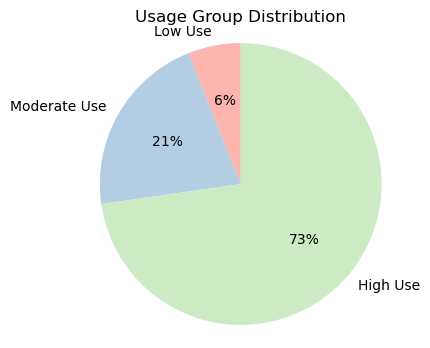

In [25]:
# Filter out days with < 200 TotalSteps taken
filtered_daily_activity = daily_activity[daily_activity['TotalSteps'] > 200]

# Group by 'Id' and count the number of days used
daily_use2 = filtered_daily_activity.groupby('Id')['ActivityDate'].count().reset_index()
daily_use2.rename(columns={'ActivityDate': 'daysused'}, inplace=True)

# Assign usage categories based on the number of days used
daily_use2['Usage'] = pd.cut(daily_use2['daysused'], bins=[0, 14, 21, 31],
                             labels=['Low Use', 'Moderate Use', 'High Use'])

# Calculate percentage and total participants for each usage type
daily_use = daily_use2.groupby('Usage').agg(participants=('Id', 'nunique')).reset_index()
daily_use['perc'] = (daily_use['participants'] / daily_use['participants'].sum()) * 100
daily_use['perc'] = daily_use['perc'].map('{:.0f}%'.format)

# Plot the pie chart for distribution of different usage types
plt.figure(figsize=(4, 4))
plt.pie(daily_use['participants'], labels=daily_use['Usage'], autopct='%1.0f%%', startangle=90,
        colors=plt.cm.Pastel1.colors)
plt.title('Usage Group Distribution')
plt.axis('equal')
plt.show()


The pie chart illustrates the distribution of participants in different usage categories based on the number of days they have actively used the Fitbit tracker, filtering out days with less than 200 TotalSteps taken. The usage categories are defined as follows:

1. Low Use: Participants who used the Fitbit tracker for less than or equal to 14 days.
2. Moderate Use: Participants who used the Fitbit tracker for more than 14 days but less than or equal to 21 days.
3. High Use: Participants who used the Fitbit tracker for more than 21 days.

Insights:
1. Majority of Participants: The largest segment of participants (73%) fall under the "High Use" category, indicating that a significant number of users actively engaged with their Fitbit trackers for more than 21 days.

2. Moderate Use: The "Moderate Use" category accounts for the second largest proportion of participants (21%). This suggests that a substantial number of users used their Fitbit trackers for more than two weeks but did not reach the threshold of using it for more than 21 days.

3. Low Use: The smallest segment is the "Low Use" category (6%), representing users who used the Fitbit tracker for less than or equal to 14 days. This indicates a relatively smaller group of participants who may have used the device for a brief period or infrequently.


**About Missing Data:** According to this chart, we can suppose that the missing data in the combined_df DataFrame can be justified by participants not wearing the Fitbit device during certain activities or periods, not recording specific metrics, and not providing continuous data throughout the day. 



#### Calculate the correlation matrix

In [26]:
df = combined_df

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)


                                Id   WeekDay  TotalSteps  TotalDistance  \
Id                        1.000000  0.002936    0.053521       0.063773   
WeekDay                   0.002936  1.000000    0.074058       0.082191   
TotalSteps                0.053521  0.074058    1.000000       0.987553   
TotalDistance             0.063773  0.082191    0.987553       1.000000   
TotalActiveMinutes        0.023239  0.063240    0.719934       0.651848   
TotalMinutes             -0.007118  0.114056    0.097026       0.122763   
TotalActiveHours          0.020538  0.056065    0.736309       0.671653   
LightlyActiveMinutes      0.000735 -0.003556    0.423133       0.351402   
FairlyActiveMinutes       0.006981  0.203004    0.359625       0.333465   
VeryActiveMinutes         0.057085  0.074975    0.762590       0.760408   
LightActiveDistance       0.027151  0.056245    0.589287       0.558477   
ModeratelyActiveDistance  0.003050  0.199246    0.331307       0.304462   
VeryActiveDistance       

/tmp/ipykernel_20/3457317263.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


### **Insights from the Correlation Matrix:**

The correlation matrix shows the relationships between various features in the dataset. The values range from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.

1. **TotalSteps, TotalDistance, TotalActiveMinutes, TotalActiveHours, LightlyActiveMinutes, and VeryActiveMinutes:**
   - TotalSteps and TotalDistance have a very high positive correlation of approximately 0.99, indicating that they are almost perfectly linearly related. This is expected since more steps typically result in covering more distance.
   - TotalSteps and TotalActiveMinutes, as well as TotalDistance and TotalActiveMinutes, have positive correlations around 0.77 and 0.62, respectively. It suggests that higher step counts and greater distances covered are associated with more active minutes.
 

2. **FairlyActiveMinutes and ModeratelyActiveDistance:**
   - FairlyActiveMinutes and ModeratelyActiveDistance have a high positive correlation of about 0.96, indicating that participants who spend more time in fairly active activities tend to cover a greater distance during moderately active activities.

3. **VeryActiveMinutes and VeryActiveDistance:**
   - VeryActiveMinutes and VeryActiveDistance have a strong positive correlation of approximately 0.84, suggesting that participants who spend more time in very active activities tend to cover longer distances during such activities.

4. **Calories and TotalActiveMinutes:**
   - Calories burned and TotalActiveMinutes have a moderate positive correlation of around 0.55. This indicates that more active minutes are generally associated with higher calorie burn.

5. **BMI and WeightKg:**
   - BMI and WeightKg (weight in kilograms) have a moderate positive correlation of approximately 0.62, indicating that higher body weights are associated with higher BMI values.

6. **MinuteAverage and HourlyAverage:**
   - The correlations between "MinuteAverage" and "HourlyAverage" with other variables are relatively weak. While there are some correlations, they are not strong enough to draw definitive conclusions about their direct impact on activity levels



# 5. Share phase

## Let's visualize the correlation matrix for easy analysis

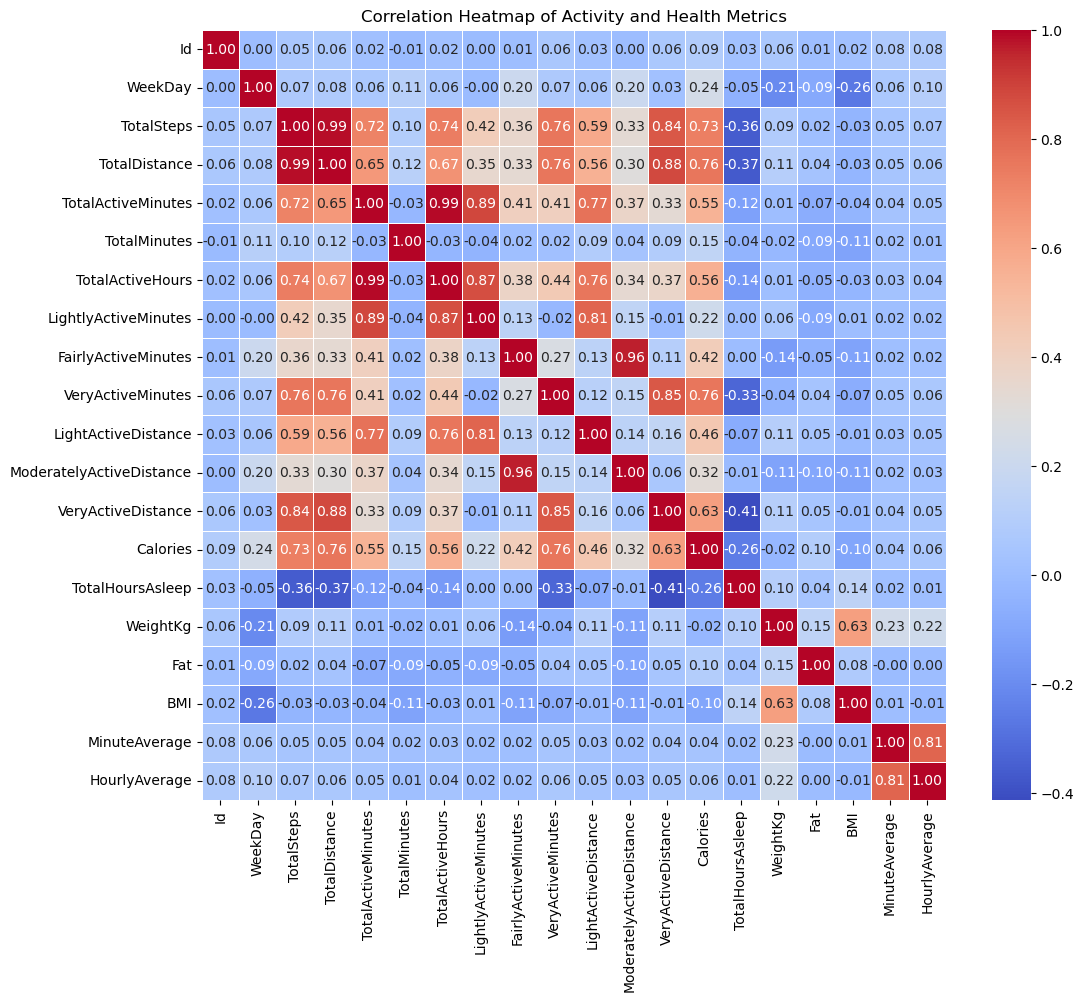

In [27]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Activity and Health Metrics")
plt.show()

## Comparing correlations:

#### Calories

Let's compare the correlations of the "Calories" variable with other features in the dataset and provide insights into the relationships:

1. **Calories and TotalActiveMinutes:**
   - Calories have a moderate positive correlation (approximately 0.55) with TotalActiveMinutes.
   - This indicates that participants who engage in more active minutes tend to burn more calories. It makes intuitive sense, as physical activity leads to higher energy expenditure.

2. **Calories and TotalSteps, TotalDistance:**
   - Calories have a positive correlation with both TotalSteps (approximately 0.73) and TotalDistance (approximately 0.76).
   - This suggests that participants who take more steps and cover greater distances tend to burn more calories.
   - It reaffirms the relationship between physical activity (measured by steps and distance) and calorie expenditure.

3. **Calories and VeryActiveMinutes, VeryActiveDistance:**
   - Calories have a relatively strong positive correlation with VeryActiveMinutes (approximately 0.76) and VeryActiveDistance (approximately 0.63).
   - Participants who spend more time in very active activities and cover longer distances during such activities tend to burn more calories.
   - Very active activities are likely to be more intense and result in higher calorie burn.

4. **Calories and FairlyActiveMinutes, ModeratelyActiveDistance:**
   - Calories have a moderate positive correlation with FairlyActiveMinutes (approximately 0.42) and ModeratelyActiveDistance (approximately 0.32).
   - Fairly active and moderately active activities are less intense than very active activities but still contribute to calorie burn.

5. **Calories and LightlyActiveMinutes, LightActiveDistance:**
   - Calories have a moderate positive correlation with LightlyActiveMinutes (approximately 0.22) and LightActiveDistance (approximately 0.46).
   - Light physical activities contribute to calorie burn, but their impact is relatively lower compared to more intense activities.
   - It suggests that even light activities, when accumulated over time, can contribute to calorie expenditure.

6. **Calories and TotalHoursAsleep:**
   - Calories and TotalHoursAsleep have a moderate negative correlation (approximately -0.26). This negative correlation indicates that there is an inverse relationship between the number of calories burned and the total minutes of sleep. It suggests that higher calorie burn is associated with fewer total minutes of sleep. 
   - The relationship is not very strong, but indicating that sleep duration may  have a some direct impact on daily calorie burn. However, it's important to note that correlation does not necessarily imply causation. The negative correlation between calories and total minutes asleep may be influenced by other factors that affect both variables.

7. **Calories and BMI, WeightKg, Fat:**
   - Calories have a weak negative correlation with BMI (approximately -0.10), and with WeightKg (approximately -0.02) and a very weak positive correlation with Fat (approximately 0.10).
   - Calories have a weak negative correlation with BMI: Approximately -0.10. This suggests that as BMI (body mass index) increases, calorie burn tends to decrease slightly. In other words, individuals with higher BMI may burn slightly fewer calories compared to those with lower BMI.
   - Calories have a very weak positive correlation with Fat: Approximately 0.10. This indicates that as the percentage of body fat increases, calorie burn also tends to increase slightly. However, the correlation is quite weak, and other factors are likely to have a more significant impact on calorie burn.
   - Calories have a very weak negative correlation with WeightKg: Approximately -0.02. This means that as calorie burn  decreases, the body weight increases,  slightly, but the correlation is so weak that it is not practically significant.

8. **Comparing the impact of activity levels and distances on Calories burned**

    - Both activity levels and distance levels have positive impacts on calorie burn (Calories). However, the correlation values suggest that activity levels (TotalSteps, TotalActiveMinutes, VeryActiveMinutes, LightlyActiveMinutes, FairlyActiveMinutes) have a slightly stronger correlation with Calories compared to distance levels (TotalDistance, LightActiveDistance, ModeratelyActiveDistance, VeryActiveDistance).
    - This implies that while both increasing overall activity and covering longer distances are beneficial for burning calories, the intensity and engagement in various activity levels play a significant role in calorie expenditure.

#### Heart rate

 - Overall, the correlations between heart rate (MinuteAverage and HourlyAverage) and other variables are generally weak, suggesting that heart rate does not have a strong linear relationship with most of the recorded metrics. 
 - However, the positive correlations with physical activity-related variables (TotalSteps, TotalDistance, TotalActiveMinutes, VeryActiveMinutes, LightActiveDistance, and Calories) indicate that higher heart rates may be associated with increased activity levels and energy expenditure during exercise. 
 - The weak negative correlations with TotalHoursAsleep, WeightKg, and Fat suggest a possible association between lower heart rate and better sleep quality, lower body weight, and lower body fat percentage, respectively.


#### TotalMinutesAsleep

Let's compare the correlations of "TotalHoursAsleep" with other features in the dataset and provide insights into the relationships:

1. **TotalHoursAsleep:**
   - TotalHoursAsleep represents the total number of hours slept by the individual.
   - TotalHoursAsleep has a weak negative correlation with the following variables:
     - TotalSteps: Approximately -0.36, indicating a weak negative relationship between the total hours of sleep and the number of steps taken. This suggests that individuals who sleep more may tend to take fewer steps during the day.
     - TotalDistance: Approximately -0.37, suggesting a weak negative correlation between the total hours of sleep and the total distance covered. This means that individuals who sleep more may cover a shorter distance throughout the day.
     - TotalActiveMinutes: Approximately -0.12, indicating a weak negative correlation between total hours of sleep and total active minutes. This suggests that individuals who sleep more may engage in fewer active minutes.
     - VeryActiveMinutes: Approximately -0.33, suggesting a weak negative correlation between total hours of sleep and very active minutes. This means that individuals who sleep more may spend less time in very active activities.
     - Calories: Approximately -0.26. This means that as the total hours of sleep increase, there is a slight tendency for calorie burn to decrease. In other words, individuals who sleep more may burn slightly fewer calories compared to those who sleep less.

   - TotalHoursAsleep has a weak positive correlation with the following variable:
     - WeightKg: Approximately 0.10, indicating a weak positive correlation between total hours of sleep and body weight. This suggests that individuals who sleep more may tend to have a slightly higher body weight.

2. **Other Variables:**
   - TotalSteps, TotalDistance, TotalActiveMinutes, and VeryActiveMinutes have negative correlations with TotalHoursAsleep, suggesting that higher activity levels are associated with shorter sleep durations.
   - Calories also has a negative correlation with TotalHoursAsleep, indicating that higher calorie burn is associated with shorter sleep durations.
   - WeightKg has a positive correlation with TotalHoursAsleep, suggesting that higher body weight is associated with longer sleep durations.

Overall, the correlations between TotalHoursAsleep and other variables show that individuals who sleep more tend to be less physically active, cover shorter distances, and burn fewer calories. Additionally, there is a weak positive correlation between total hours of sleep and body weight, indicating that individuals with longer sleep durations may have slightly higher body weights. However, it's important to note that correlation does not imply causation, and other factors may influence these relationships. It's essential to consider individual variations and lifestyle factors when interpreting these correlations.

#### Weight, BMI and Fat percentage

**Weight (WeightKg):**
1. TotalSteps: Very weak positive correlation (0.09) - Suggests a slight tendency for individuals with higher body weight to take slightly more steps, but the impact is not significant.

2. TotalDistance: Very weak positive correlation (0.11) - Implies that individuals with higher body weight may cover slightly more distance, but the correlation is not strong.

3. TotalActiveMinutes: Very weak positive correlation (0.01) - Body weight has little to no impact on the total minutes of active physical activity.

4. TotalHoursAsleep: Very weak negative correlation (-0.05) - Individuals with higher body weight may sleep slightly fewer hours, but the correlation is not significant.

**BMI:**
1. TotalSteps: Very weak positive correlation (0.05) - Suggests a slight tendency for individuals with higher BMI values to take slightly more steps, but the impact is not strong.

2. TotalDistance: Very weak positive correlation (0.05) - Implies that individuals with higher BMI values may cover slightly more distance, but the correlation is not substantial.

3. TotalActiveMinutes: Very weak positive correlation (0.04) - BMI has little to no impact on the total minutes of active physical activity.

4. TotalHoursAsleep: Weak negative correlation (-0.11) - Individuals with higher BMI values may sleep slightly fewer hours, but the correlation is not strong.

**Fat:**
1. TotalSteps: Very weak positive correlation (0.08) - Suggests a slight tendency for individuals with higher body fat percentages to take slightly more steps, but the impact is not strong.

2. TotalDistance: Very weak positive correlation (0.10) - Implies that individuals with higher body fat percentages may cover slightly more distance, but the correlation is not significant.

3. TotalActiveMinutes: Very weak positive correlation (0.04) - Body fat percentage has little to no impact on the total minutes of active physical activity.

4. TotalHoursAsleep: Very weak negative correlation (-0.04) - Body fat percentage has little to no impact on sleep duration.

The correlations between weight, BMI, and fat with other variables are generally weak, suggesting that these body composition measures alone do not strongly influence physical activity, sleep patterns, or calorie burn.

# 6. Act phase

### Trends in Smart Device Usage and Implications for Bellabeat

**Trends in Smart Device Usage and Implications for Bellabeat:**

1. **Activity Tracking and Fitness Goals:** The correlation between TotalSteps, TotalDistance, and TotalActiveMinutes suggests that users who track their daily activity levels are more likely to set and achieve fitness goals. Bellabeat can encourage customers to use their smart devices to monitor their steps, distance, and active minutes, providing them with personalized fitness goals and challenges.

2. **High-Intensity Workouts:** The correlation between TotalActiveMinutes and VeryActiveMinutes indicates that customers who engage in high-intensity workouts also have higher total active minutes. Bellabeat can leverage this trend by offering a variety of high-intensity workout plans and promoting interval training to cater to different fitness levels and preferences.

3. **Activity-Sleep Relationship:** The correlation between TotalActiveMinutes and TotalHoursAsleep suggests a link between physical activity and sleep quality. Bellabeat can provide customers with insights into how their activity levels impact their sleep patterns, enabling them to make lifestyle adjustments for improved well-being.

4. **Calorie Tracking and Active Minutes:** The correlation between Calories and TotalActiveMinutes highlights the importance of active minutes in accurate calorie tracking. Bellabeat can educate customers about the significance of staying active to achieve weight management and fitness goals effectively.

**Implications for Bellabeat Customers:**

1. **Personalized Fitness Guidance:** Bellabeat customers can benefit from personalized fitness guidance based on their activity levels and goals. The smart devices can provide customized workout plans and challenges, motivating users to stay active and track their progress effectively.

2. **Better Workout Planning:** Understanding the correlation between activity intensity and total active minutes allows Bellabeat customers to plan more effective workouts. Users can access a variety of high-intensity exercises and interval training to optimize their fitness routine.

3. **Holistic Approach to Wellness:** Bellabeat's smart devices offer a holistic approach to wellness by providing insights into the relationship between activity and sleep. Customers can make informed decisions about their lifestyle, considering both their physical activity and sleep patterns.

**Implications for Bellabeat Marketing Strategy:**

1. **Promotion of Activity Tracking:** Bellabeat can market its smart devices by emphasizing the benefits of activity tracking for achieving fitness goals. Highlighting the correlation between activity levels and fitness outcomes can position the brand as a comprehensive fitness solution.

2. **Targeted Campaigns for Active Lifestyles:** Based on the correlation between activity minutes and total minutes, Bellabeat can run targeted marketing campaigns promoting active lifestyles. Collaborating with fitness influencers and organizing events can encourage users to prioritize physical activities.

3. **Customizable Fitness Programs:** Bellabeat can develop and market customizable fitness programs aligned with the observed trends. These programs can cater to different user preferences and fitness goals, attracting a broader audience.

4. **Integrated Sleep and Activity Insights:** Marketing efforts can emphasize the importance of a balanced approach to fitness and wellness by integrating sleep and activity insights. Bellabeat can create content and campaigns that educate users about the impact of sleep on overall health.


## Conclusion

In conclusion, the correlation matrix analysis reveals significant trends in smart device usage that have implications for Bellabeat and its customers. The positive correlations between activity metrics (TotalSteps, TotalDistance, TotalActiveMinutes) suggest a strong connection between fitness tracking and goal achievement, providing Bellabeat customers with insights to improve their active lifestyles.

Furthermore, the negative correlation between TotalActiveMinutes and TotalHoursAsleep highlights the potential relationship between physical activity and sleep quality. This insight enables Bellabeat to offer personalized fitness guidance and promote better sleep habits among its users.

Moreover, the correlations of Calories with BMI and WeightKg indicate a potential link between calorie management and weight-related goals. By integrating this data, Bellabeat can offer targeted weight and BMI monitoring features to help customers achieve their desired health outcomes.

The heart rate's correlation with activity levels also presents opportunities for Bellabeat to enhance its heart rate tracking capabilities and provide users with comprehensive health insights.

These trends offer Bellabeat valuable insights to shape its marketing strategy. By emphasizing data-driven health solutions, personalized features, and collaborations with fitness influencers and experts, Bellabeat can position itself as a leading brand in the health and fitness technology market.

Addressing sedentary behavior through in-app reminders and fostering a social community will further enhance user engagement and loyalty. By continuously improving its offerings and aligning them with customer needs, Bellabeat can create a meaningful impact in the wellness industry and establish itself as a preferred choice for health-conscious individuals seeking holistic and technology-driven well-being solutions.

> Please, upvote and leave your comments and contributions! Thanks! <